In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import mab_exp as expb
import mab_bernoulli as brn
import pandas as pd

In [28]:
def AR_bern(T, arms, priors, armData):
    K = len(arms)
    assert K == len(armData)

    readIdx = [0 for _ in range(K)]

    rewards = []
    dataUsed = np.zeros((T, K))
    
    countReal = 0

    while countReal < T:
        samples = [np.random.beta(a,b) for a,b in priors]
        arm = np.argmax(samples)
        if(readIdx[arm] < len(armData[arm])):
            rew = armData[arm][readIdx[arm]]
            readIdx[arm] += 1
        else:
            rew = np.random.binomial(1, arms[arm])
            rewards.append(rew)
            countReal += 1
            #track data used
            dataUsed[countReal-1] += np.array(readIdx)
        #update prior
        priors[arm][0] += rew
        priors[arm][1] += 1 - rew
    return rewards, dataUsed

In [64]:
#params
T = 1000
samples = 500

armProbs = [0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
#armProbs = np.random.uniform(0, 1, size = 2)
K = len(armProbs)
#armDataAmt = [60 for _ in range(K)]
armDataAmt = [int(np.sqrt(T)) for _ in range(K)]

opt_arm = np.max(armProbs)

plotNum = 1
names = ["FS", "AR", "TS"]
colors = ["red", "green", "blue"]

In [65]:
regret_vec = np.zeros((samples, T))
data_used = np.zeros((T, K))

for i in tqdm(range(samples)):
    armData = [brn.gen_data(armProbs[i], armDataAmt[i]) for i in range(K)]
    emptyData = [[] for _ in range(K)]

    ar_reward, used = AR_bern(T, armProbs, brn.flat_priors(K), armData)

    regret_vec[i] = np.cumsum(opt_arm - ar_reward)
    data_used += used/samples
    

  0%|          | 0/500 [00:00<?, ?it/s]

[25.608  9.154  9.052  8.776  9.52   9.014  8.9    8.926  8.73   9.404]
[31.    22.214 21.992 22.36  22.768 21.656 22.152 22.052 22.086 21.894]


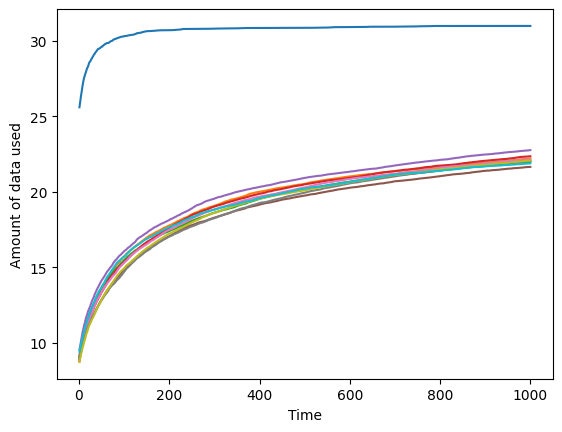

In [66]:
c = range(1, T+1)
for arm in range(K):
    plt.plot(c, data_used[:,arm])
plt.xlabel("Time")
plt.ylabel("Amount of data used")
print(data_used[0])
print(data_used[T-1])